# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Adquirindo os dados e removendo algumas colunas

In [2]:
df = pd.read_csv("Profissao- Cientista de Dados_M10_support material.csv")
df = df.loc[:,df.columns[1:]].drop(columns='index')
df['data_ref'] = pd.to_datetime(df['data_ref'])
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


Coletando os nomes das variáveis qualitativas para criar os gráficos de distribuição

In [3]:
obj_type_var = df.select_dtypes('object').columns

Gerando os gráficos com um loop *for*

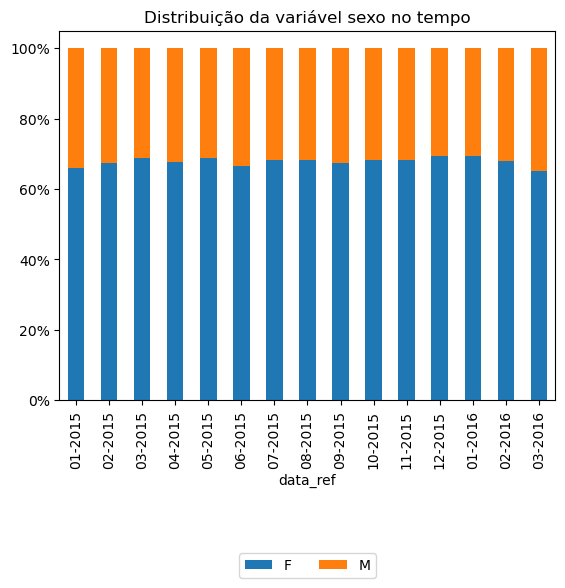

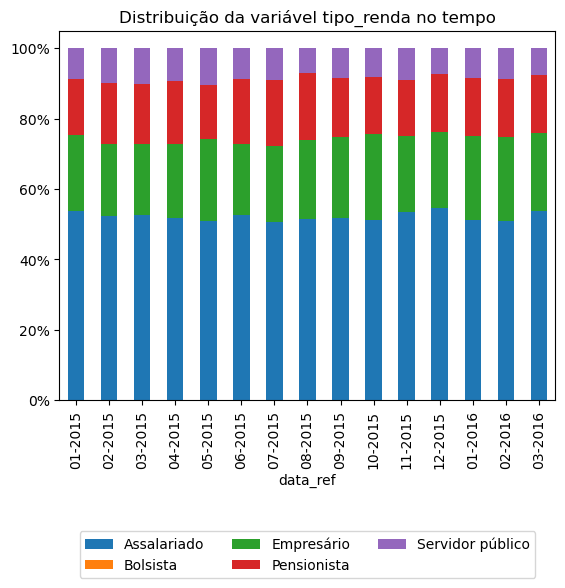

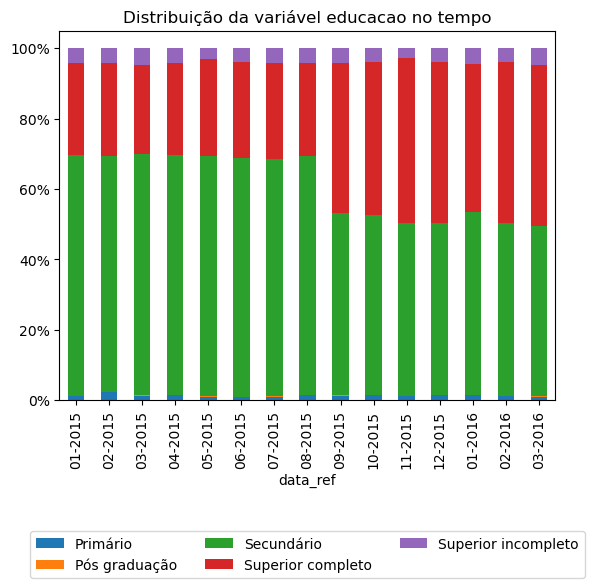

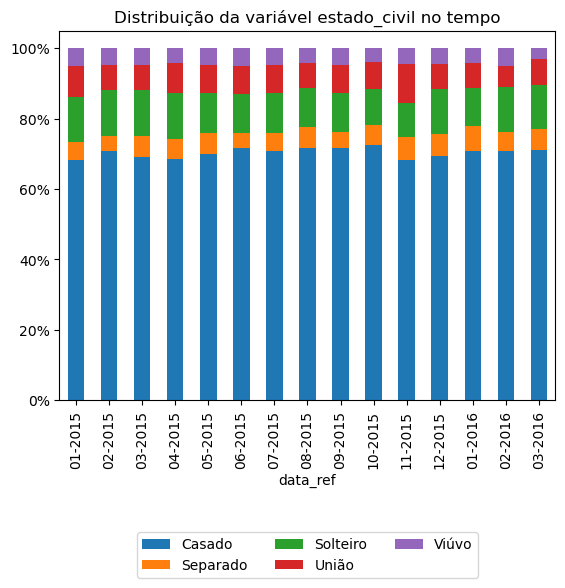

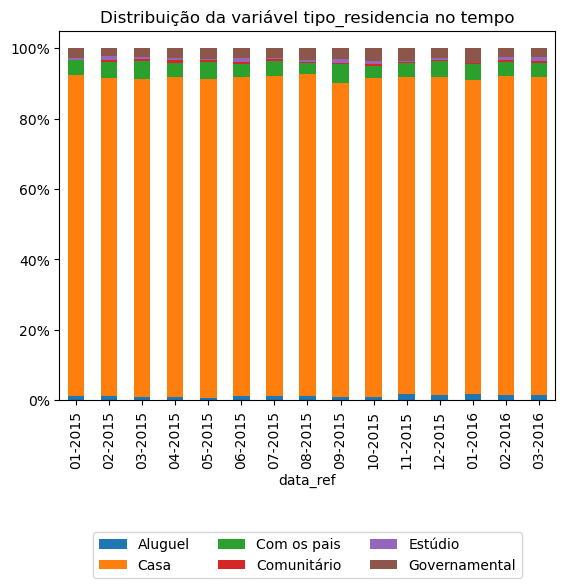

In [22]:
# importando um módulo específico para formatar os rótulos do eixo y em porcentagens

from matplotlib.ticker import FuncFormatter

# Função para formatar os rótulos do eixo y como porcentagens
def to_percent(y, position):
    return f'{y * 100:.0f}%'

for col in obj_type_var:
    tab = pd.crosstab(df['data_ref'], df[col])
    tab = tab.div(tab.sum(axis=1), axis=0)  # Dividindo para obter proporções

    ax = tab.plot.bar(stacked=True)

    tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

    ax.set_title(f"Distribuição da variável {col} no tempo")
    ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=90)

    # Aplicando a formatação de porcentagem ao eixo y
    ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.50), ncol=3)

# Exibindo o gráfico
plt.show()

A vairável educacao parece ter sofrido uma alteração significativa de proporção após 08-2015. As demais me parecem estáveis

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Após reflexão vou supor que o enunciado se refere ao último método ensinado na aula anterior a este exercício

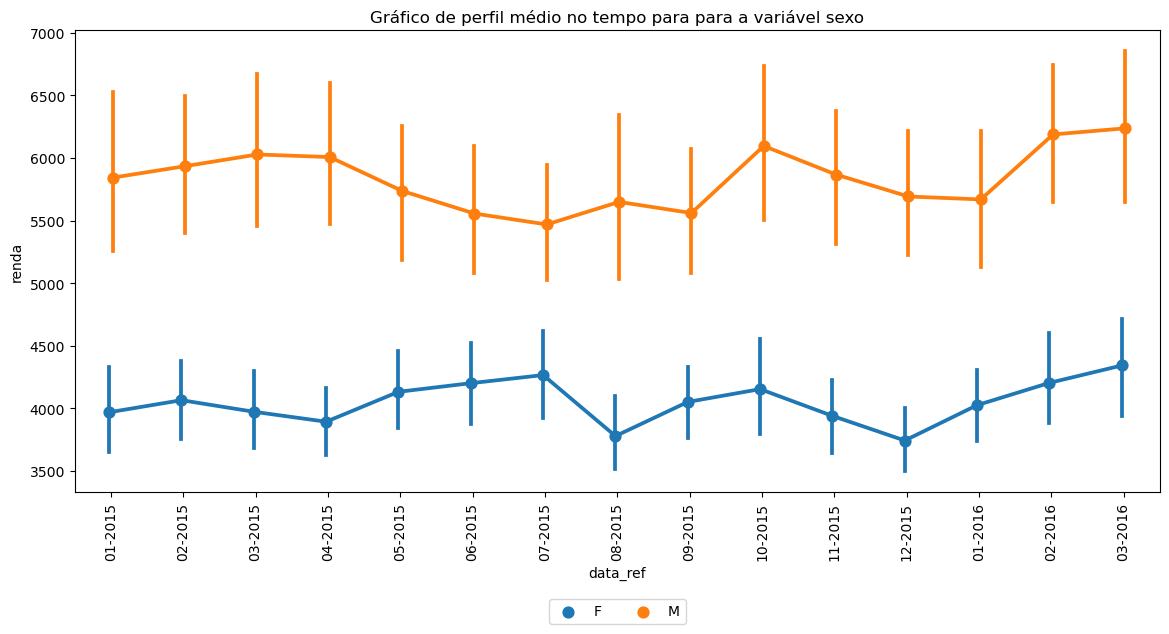

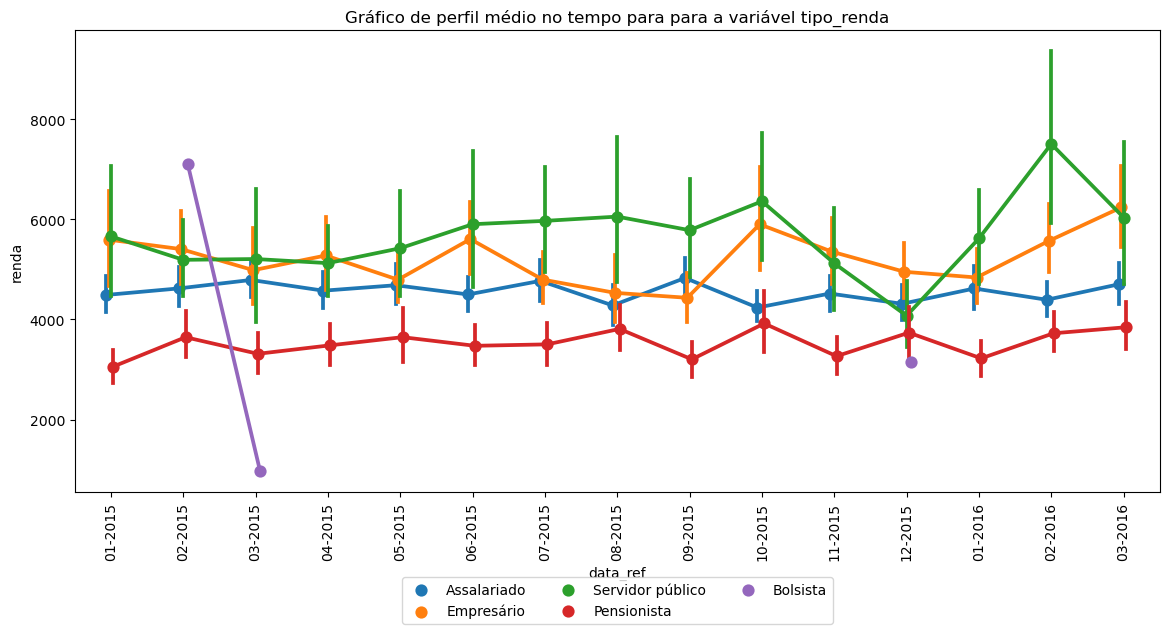

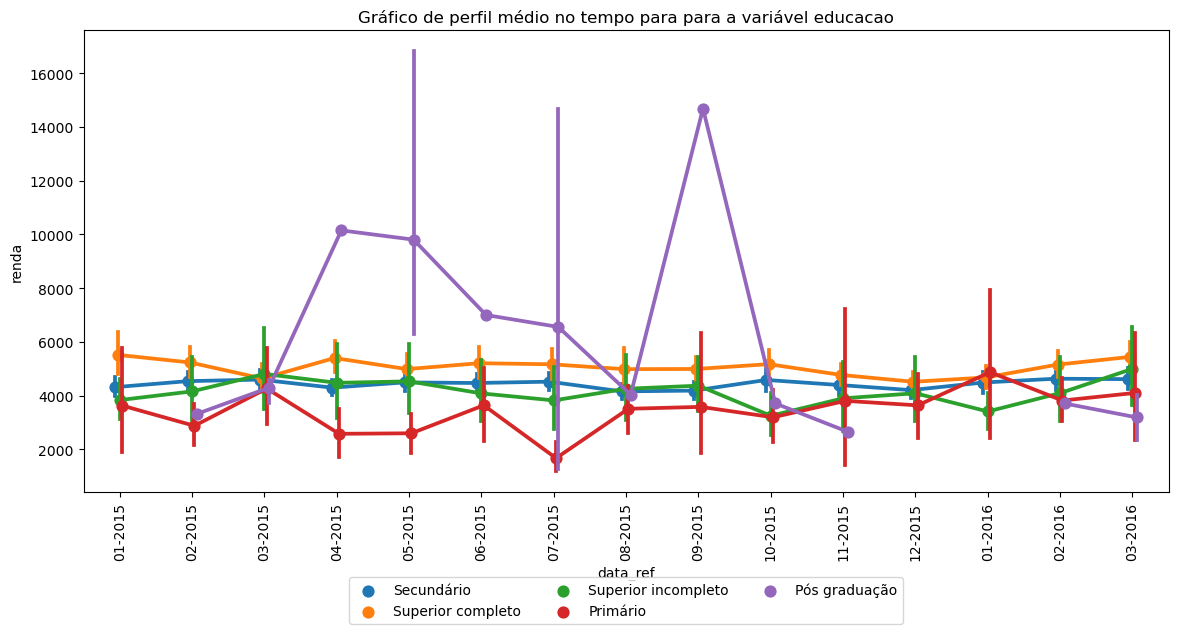

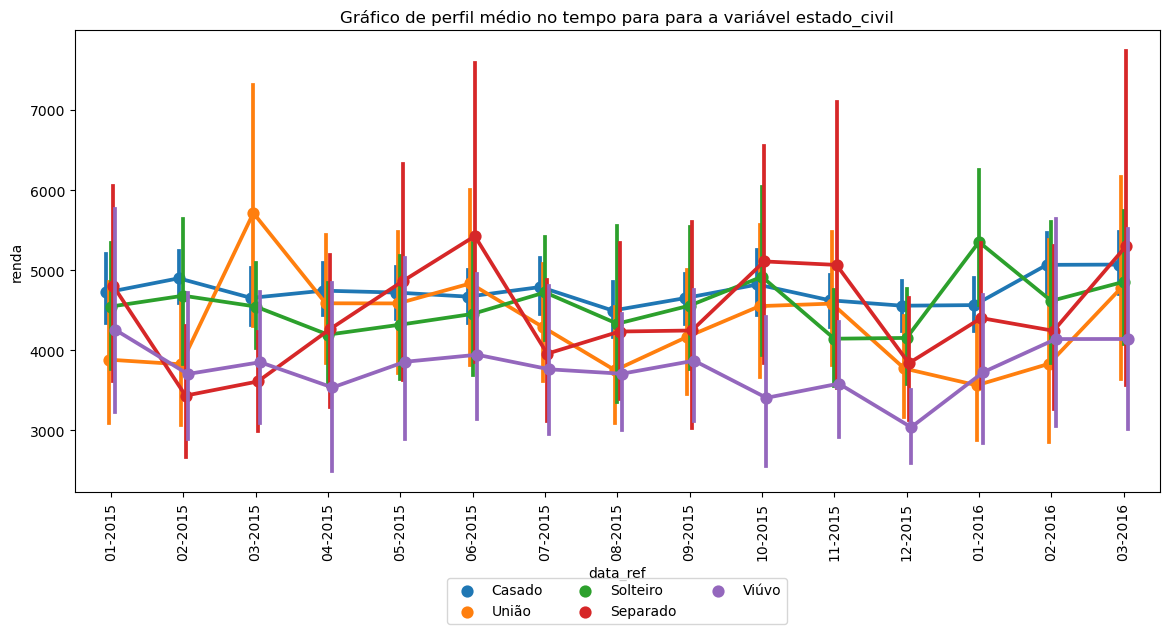

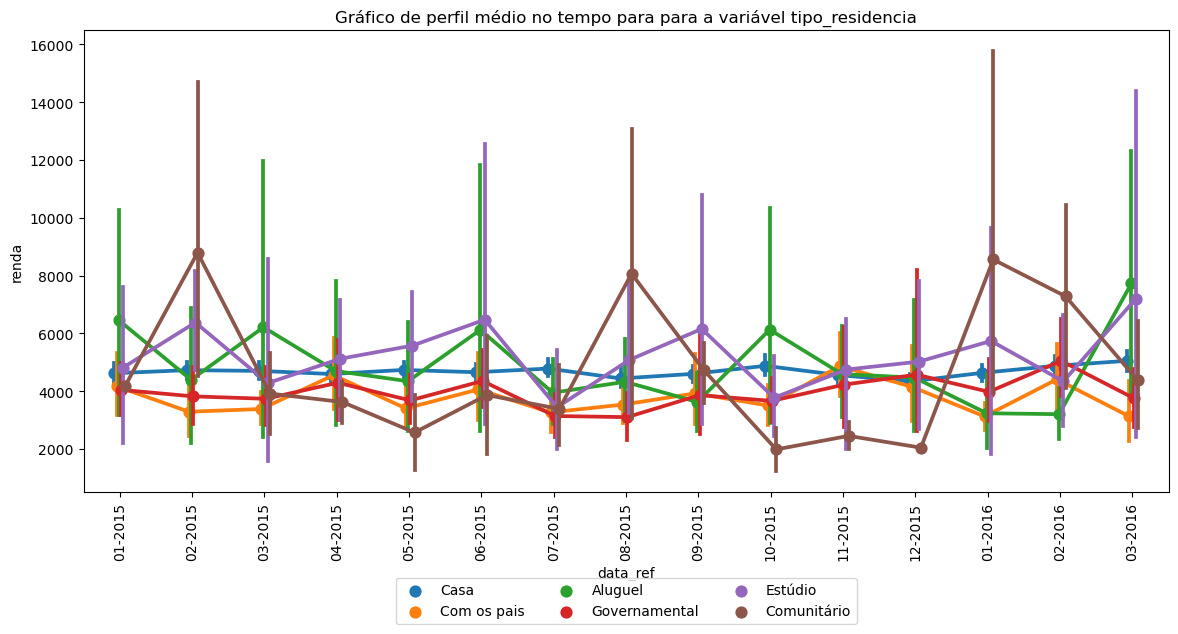

In [38]:
for col in obj_type_var:
    plt.figure(figsize=(14,6))
    ax = sns.pointplot(x="data_ref", y="renda", hue=col,
                    data=df, dodge=True, errorbar=('ci', 95))
    ax.set_title(f"Gráfico de perfil médio no tempo para para a variável {col}")
    tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

    ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=90)

    plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

As variáveis educacao e tipo_residencia parecem apresentar pouca estabilidade ao longo do tempo. Acredito que não seriam apropriadas para os modelos apresentados até então